In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Load your dataset
file_path = 'Student_performance_data .csv'
df = pd.read_csv(file_path)

# Set target and features
X = df.drop('GradeClass', axis=1)
y = df['GradeClass']

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Preprocessing: scale numeric + encode categoricals
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Full pipeline: preprocessing + model
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(" Accuracy on test set:", accuracy)




c:\Users\simmo\OneDrive\Desktop\Campus\MLG 382\Project 1\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:17:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Accuracy on test set: 0.9164926931106472


Checking basic accuracy of model

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9164926931106472


Confustion matrix

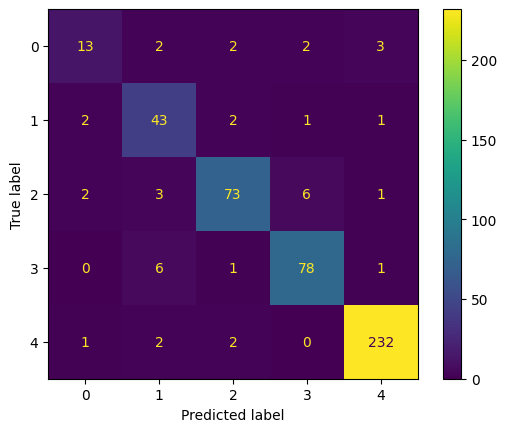

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


Classification Report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.72      0.59      0.65        22
         1.0       0.77      0.88      0.82        49
         2.0       0.91      0.86      0.88        85
         3.0       0.90      0.91      0.90        86
         4.0       0.97      0.98      0.98       237

    accuracy                           0.92       479
   macro avg       0.85      0.84      0.85       479
weighted avg       0.92      0.92      0.92       479

